# Python example for Karhunen-Loeve Transform (KLT)

Take an image and read it into Python:

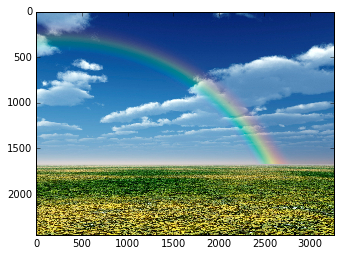

In [1]:
%matplotlib inline
import numpy as np 
from numpy import linalg as LA 
import matplotlib.pyplot as plt 
from scipy import signal 

pic = plt.imread('img.jpg') 
plt.imshow(pic) 

Now convert it to the (2 dimensional) luminance component y, **Y = 0.299R + 0.587 G + 0.114 B** (library pyplot has R at index 0):

In [2]:
Y = 0.299*pic[:,:,0] + 0.587*pic[:,:,1] + 0.114*pic[:,:,2]
Y.shape

(2448, 3264)

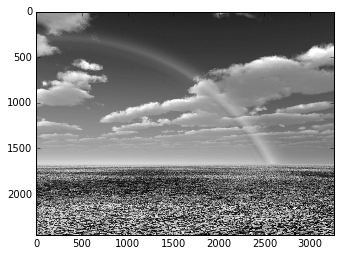

In [3]:
plt.figure()
plt.imshow(Y,cmap='gray')

meaning we have 2448 rows and 3264 columns.

Now we construct the matrix $X$ , for blocks of size $N=4$. The dimension of this matrix is 4 columns and $2448*3264/4=1997568$ rows. We use the command "reshape", which reads out a matrix column wise and puts this in a new matrix with given dimension: $reshape (Y, SIZE)$. Since reshape reads out the values column wise, we need to transpose the matrices to read out the rows with length 4:

In [4]:
x = np.reshape(Y,(-1,4), order='C')
x.shape

(1997568, 4)

So here we see that it has the correct size. Next we can compute the autocorrelation matrix $A_{xx} =x^T ⋅x$ .

In [5]:
Axx=np.dot(x.T,x)
Axx.shape

(4, 4)

Here we now have the autocorrelation matrix with the correct size (4x4).

Now we can compute the eigenvectors and eigenvalues.

To obtain the eigenvectors we use the command "eig" in Python:

In [6]:
Lambda, T = LA.eig (Axx)

where V contains the eigenvectors as column vectors.

In [7]:
Lambda, T = LA.eig(Axx) 
Lambda, T

(array([  1.31931129e+11,   3.96188690e+08,   8.39426842e+07,
          3.40422948e+07]),
 array([[ 0.4995911 ,  0.65509302,  0.50006571, -0.26682607],
        [ 0.50056687,  0.26616083, -0.49906704,  0.65538028],
        [ 0.5004506 , -0.26667758, -0.49991403, -0.65461304],
        [ 0.49939037, -0.65490046,  0.50095143,  0.26601186]]))

Here, T now is our KLT for the rows of our image. Since this is a 4x4 transform matrix, we obtain 4 subband filters with 4 impulse responses. We can now also plot the 4 impulse responses of our KLT,

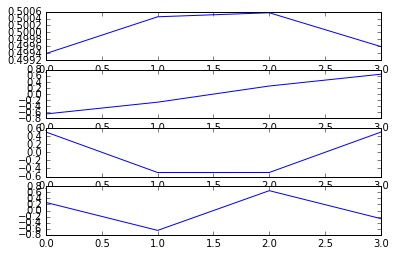

In [8]:
plt.figure()
for k in range(0, 4):
    plt.subplot(4, 1, k+1)
    plt.plot(np.flipud(T[:, k]))

(x-axis is sample, y axis is value)

These are the equivalent subband filter impulse responses of our KLT. Observe that it looks like filters with increasingly higher (lower) frequencies, on top is a low pass filter, below that a band pass, then another band bandpass, then a high pass. So simply by starting with a natural image has lead us to a subband decomposition, where we divide our frequency domain into different subbands! This also has some similarity to the DCT, and this is why a DCT works.

The frequency responses of these filters are,

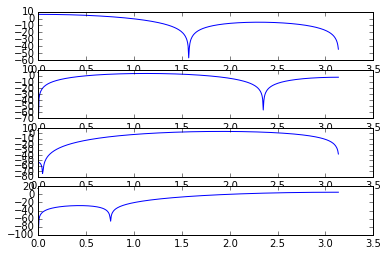

In [9]:
plt.figure()
for k in range(0,4):
    w,frresp=signal.freqz(T[:,k])
    plt.subplot(4,1,k+1)
    plt.plot(w,20*np.log10(abs(frresp)))

(x-axis is frequency, y-axis is attenuation)

Observe that the horizantal axis shows the normalized frequencies between 0 and pi.

Again we can see that the top figure shows a low pass filter, below two band pass filters, and at the bottom a high pass filter.

Now we can verify that the resulting subbands for the rows are indeed uncorrelated or orthogonal to each other. We compute the row-subbands with our KLT,

In [10]:
yr=np.dot(x,T) 
yr.shape 

(1997568, 4)

Observe: each column of yr represents a subband (we have 4 subbands, each with 1997568 samples).

Next compute the correlations between the subbands:


In [11]:
np.dot(yr.T,yr)

array([[  1.31931129e+11,  -8.78054797e-04,  -8.80196838e-04,
         -7.41657925e-04],
       [ -8.78054797e-04,   3.96188690e+08,   1.33155663e-03,
         -6.09035311e-04],
       [ -8.80196838e-04,   1.33155663e-03,   8.39426842e+07,
          4.82892548e-04],
       [ -7.41657925e-04,  -6.09035311e-04,   4.82892548e-04,
          3.40422948e+07]])

Here we can see that the diagonal elements are of significant size (the autocorrelations of the subbands), and the off-diagonal elements are of **insignificant size** (the cross-correlations), for all practical purposes they can be neglected. This can also be seen by looking at the ratio of the larger and smaller values. We have a ratio of about $10^{11} /10^−5=10^{16}$ . This is roughly the **computational accuracy** of Python and corresponds to 160dB in power! (Since autocorrelation corresponds to a power). This is much more than the attenuation of our filters, and hence can be neglected. This means the subbands are indeed uncorrelated or orthogonal to each other, and the KLT indeed works!

Next we still need to compute the KLT for the **columns**,

In [12]:
xc=np.reshape(Y.T,(-1,4), order='C') 
xc.shape 

(1997568, 4)

In [13]:
Axxc=np.dot(xc.T,xc) 
Axxc.shape

(4, 4)

In [14]:
Lambdac, Tc = LA.eig(Axxc) 
Lambdac, Tc 

(array([  1.29249288e+11,   1.98098811e+09,   8.89518406e+08,
          3.25508845e+08]),
 array([[-0.49808768, -0.62835252,  0.4956057 , -0.33385142],
        [-0.50174968, -0.32670772, -0.49355375,  0.63080427],
        [-0.50183264,  0.33118591, -0.50279306, -0.62103063],
        [-0.4983171 ,  0.62349906,  0.50791616,  0.32396014]]))

Compare it with the KLT for the rows,

In [15]:
T

array([[ 0.4995911 ,  0.65509302,  0.50006571, -0.26682607],
       [ 0.50056687,  0.26616083, -0.49906704,  0.65538028],
       [ 0.5004506 , -0.26667758, -0.49991403, -0.65461304],
       [ 0.49939037, -0.65490046,  0.50095143,  0.26601186]])

We can see that the KLT's for the rows and the columns are almost identical for this picture. The slight differences or similarities can also be seen from the correlation matrices for the rows and columns,

In [16]:
Axx

array([[  3.31222956e+10,   3.30353495e+10,   3.29012561e+10,
          3.27642661e+10],
       [  3.30353495e+10,   3.31212088e+10,   3.30281508e+10,
          3.28958055e+10],
       [  3.29012561e+10,   3.30281508e+10,   3.31059987e+10,
          3.30144987e+10],
       [  3.27642661e+10,   3.28958055e+10,   3.30144987e+10,
          3.30957999e+10]])

In [17]:
Axxc

array([[  3.31025435e+10,   3.24219168e+10,   3.17403045e+10,
          3.14930016e+10],
       [  3.24219168e+10,   3.30965156e+10,   3.24231184e+10,
          3.17562571e+10],
       [  3.17403045e+10,   3.24231184e+10,   3.31173190e+10,
          3.24380113e+10],
       [  3.14930016e+10,   3.17562571e+10,   3.24380113e+10,
          3.31289248e+10]])

To apply these KLT's to transform an image, we first divide it into blocks $B$ of size $4x4$ (in this case) and then transform each block with the KLT for the columns $T_c$ and for the rows $T$, in the encoder with,
$$y=T_c^T ⋅B⋅T$$
In the decoder we get the inverse operations,
$$B=T^{−T}_c⋅y⋅T^{−1}$$
Since we know that the KLT matrix consists of the eigenvectors of a symmetric matrix (our correlation matrix), we know that these eigenvectors are orthogonal to each other, and hence the inverse is identical to the transpose, as we can see trying it out,

In [18]:
LA.inv(T)-T.T

array([[ -5.55111512e-17,   1.11022302e-16,  -1.11022302e-16,
          1.66533454e-16],
       [  1.08801856e-14,  -1.04916076e-14,  -1.18793864e-14,
          1.13242749e-14],
       [ -1.96509475e-14,   9.01501096e-14,  -8.99835761e-14,
          1.95399252e-14],
       [  6.47260023e-14,  -6.37268016e-14,  -6.42819131e-14,
          6.37823128e-14]])

Here we see the difference between the inverse and the transpose is zero up the the computational accuracy of Python. Hence we can replace the inversion with a transposition, which is much simpler to compute,
$$B=T^{−T}_c⋅y⋅T^{−1}=T_c⋅y⋅T^T$$

This is now the equation for the decoder.

---

# Python example for DCT

We again assume a number of subbands of $N=4$. We generate our transform matrix $T$,

In [19]:
N = 4
T = np.zeros((N,N))
for k in range(4):
    for n in range(4):  
        T[n,k] = np.cos(np.pi/N*(n+0.5)*(k))*np.sqrt(2.0/N);
 
T[:,0] = T[:,0]*np.sqrt(0.5)
T

array([[ 0.5       ,  0.65328148,  0.5       ,  0.27059805],
       [ 0.5       ,  0.27059805, -0.5       , -0.65328148],
       [ 0.5       , -0.27059805, -0.5       ,  0.65328148],
       [ 0.5       , -0.65328148,  0.5       , -0.27059805]])

We check if our computed matrix is indeed orthonormal, as it should be, by checking if $T⋅T^T = I$ is the identity,


In [20]:
np.dot(T,T.T)

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.38777878e-17],
       [  0.00000000e+00,   1.00000000e+00,   1.11022302e-16,
          2.49800181e-16],
       [  0.00000000e+00,   1.11022302e-16,   1.00000000e+00,
          2.77555756e-17],
       [  1.38777878e-17,   2.49800181e-16,   2.77555756e-17,
          1.00000000e+00]])

We see it is indeed the identity matrix, with the ones on the diagonal, and practically zeros on the off-diagonals.

Now we can also plot the impulse responses and the frequency responses of its 4 **equivalent filters**, as we did for the KLT,

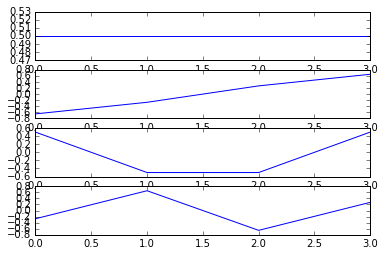

In [21]:
plt.figure()
for k in range(0,4):
    plt.subplot(4, 1, k+1)
    plt.plot(np.flipud(T[:,k]))

These are now the impulse responses of our 4 equivalent DCT filters. Compare them with the KLT(above DCT),

Observe that both are indeed quite similar.

Now we can also plot the frequency responses for the DCT equivalent filters,

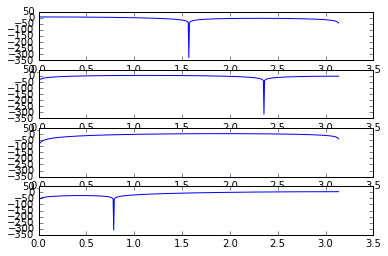

In [22]:
for k in range(0, 4):
    w,frresp = signal.freqz(T[:, k])
    plt.subplot(4, 1, k + 1)
    plt.plot(w, 20 * np.log10(abs(frresp)))

The DCT equivalent filter frequency responses.

Observe that this is again like subbands of a filter bank, with a low pass on top, below that band pass filters with increasing center frequency, and then a high pass. Also observe that except for the low pass filter, the higher filters have all zeros (the transfer function is zero in the linear scale) , meaning **infinite attenuation** (-infinity dB in the dB scale), at **frequency zero**, meaning **DC**! This is important because natural images often have a lot of energy around DC, and this keeps it out of the higher filters, to save bits.
Again quite similar to the KLT.

Observe that the DCT makes no difference for rows and columns, hence it is the same for both sides, we make no difference between $T_c$ and $T$ . 

To transform our image, with blocks $B$, in the encoder we use
$$Y =T^T ⋅B⋅T$$
and in the decoder we use
$$B=T⋅Y⋅T^T$$